In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('players_20.csv')
#sort the dataframe on the overall column
df.sort_values(by=['overall'], ascending=False, inplace=True)
#print the top 5 players
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [32]:
#list the columns of the dataframe without truncation
#and space them out a bit to make it easier to read
count = 0
for i in df.columns:
    if count == 10:
        count=0
        print("\n")
    print(f"[{i}", end="]  ")
    count += 1
    


[sofifa_id]  [player_url]  [short_name]  [long_name]  [age]  [dob]  [height_cm]  [weight_kg]  [nationality]  [club]  

[overall]  [potential]  [value_eur]  [wage_eur]  [player_positions]  [preferred_foot]  [international_reputation]  [weak_foot]  [skill_moves]  [work_rate]  

[body_type]  [real_face]  [release_clause_eur]  [player_tags]  [team_position]  [team_jersey_number]  [loaned_from]  [joined]  [contract_valid_until]  [nation_position]  

[nation_jersey_number]  [pace]  [shooting]  [passing]  [dribbling]  [defending]  [physic]  [gk_diving]  [gk_handling]  [gk_kicking]  

[gk_reflexes]  [gk_speed]  [gk_positioning]  [player_traits]  [attacking_crossing]  [attacking_finishing]  [attacking_heading_accuracy]  [attacking_short_passing]  [attacking_volleys]  [skill_dribbling]  

[skill_curve]  [skill_fk_accuracy]  [skill_long_passing]  [skill_ball_control]  [movement_acceleration]  [movement_sprint_speed]  [movement_agility]  [movement_reactions]  [movement_balance]  [power_shot_power]

In [33]:
#print the number of rows and columns in the dataframe
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 18278, Number of columns: 104


In [34]:
#group by nationality, count the number of people in each group

player_count_by_country = pd.DataFrame(df.groupby(['nationality']).count()["age"]) #gourps by country then grabs the count of a column. All the columns are the same.
player_count_by_country = player_count_by_country.reset_index() #resets the index so the nationality column and the age column are not the index
player_count_by_country.columns = ['nationality', 'player count'] #changes the column names
player_count_by_country = player_count_by_country.sort_values(by='player count', ascending=False).head(10).reset_index().drop('index', axis=1) #sorts the dataframe by the player count replace the index with a new index that corisponds with the player count
player_count_by_country

,nationality,player count
0,England,1667
1,Germany,1216
2,Spain,1035
3,France,984
4,Argentina,886
5,Brazil,824
6,Italy,732
7,Colombia,591
8,Japan,453
9,Netherlands,416


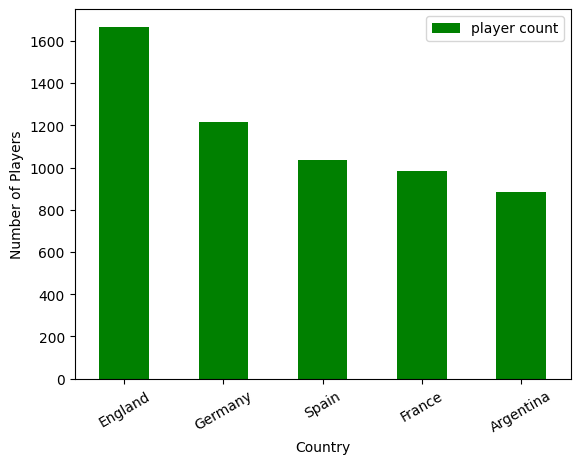

In [35]:
top_five = player_count_by_country.head(5)

# create a bar plot of the top 5 countries
ax = top_five.plot.bar(x='nationality', y='player count', color='green')

#rotate the xticks by 30 degrees to make it more readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# set the x-axis label
ax.set_xlabel('Country')

# set the y-axis label
ax.set_ylabel('Number of Players')

# show the plot
plt.show()

In [36]:
#show the short name and wage of the top 5 players
df.head(5)[["short_name", "wage_eur"]]


,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


In [37]:
#sort df by the wage_eur column. Inplace is set to the default value of False.
df.sort_values(by="wage_eur", ascending=False)[["short_name", "wage_eur"]].head(5)

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


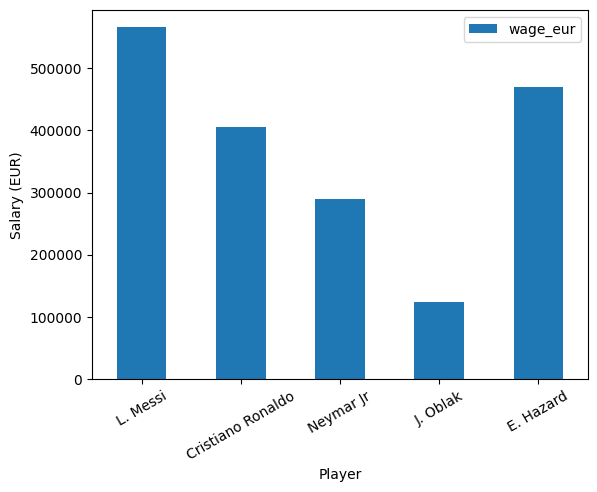

In [38]:
top_five_wages = df[["short_name", "wage_eur"]].head(5)

# create a bar plot of the top 5 countries
ax = top_five_wages.plot.bar(x='short_name', y='wage_eur')

#rotate the xticks by 30 degrees to make it more readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# set the x-axis label
ax.set_xlabel('Player')

# set the y-axis label
ax.set_ylabel('Salary (EUR)')

# show the plot
plt.show()

In [39]:
#create a new dataframe with only the players from Germany
german_players = df.loc[df['nationality'].str.contains('Germany')]
german_players = german_players.sort_values(by="overall", ascending=False)
german_players.head(10).reset_index().drop('index', axis=1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
2,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
4,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,...,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3
5,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3
6,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
7,212622,https://sofifa.com/player/212622/joshua-kimmic...,J. Kimmich,Joshua Kimmich,24,1995-02-08,176,73,Germany,FC Bayern München,...,83+3,82+3,82+3,82+3,83+3,81+3,78+3,78+3,78+3,81+3
8,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2
9,209658,https://sofifa.com/player/209658/leon-goretzka...,L. Goretzka,Leon Goretzka,24,1995-02-06,189,79,Germany,FC Bayern München,...,79+3,79+3,79+3,79+3,79+3,78+3,76+3,76+3,76+3,78+3


In [40]:
#sort german players by height
german_players.sort_values(by=["height_cm"], ascending=False).head(5)[["short_name", "height_cm"]]

,short_name,height_cm
8016,A. Seydel,199
1217,M. Esser,198
1389,L. Unnerstall,198
11147,M. Nicolas,197
11859,D. Stroh-Engel,197


In [41]:
#sort german players by weight
german_players.sort_values(by=["weight_kg"], ascending=False).head(5)[["short_name", "weight_kg"]]

,short_name,weight_kg
1389,L. Unnerstall,103
13576,L. Watkowiak,103
518,R. Fährmann,98
77,N. Süle,97
1217,M. Esser,97


In [42]:
#sort german players by wage
german_players.sort_values(by=["wage_eur"], ascending=False).head(5)[["short_name", "wage_eur"]]

,short_name,wage_eur
36,T. Kroos,330000
6,M. ter Stegen,250000
55,L. Sané,195000
146,I. Gündoğan,180000
70,T. Müller,170000


In [43]:
#sort players by overall. Show only their short name and wage
german_players.sort_values(by=["overall"], ascending=False).head(5)[["short_name", "wage_eur"]]

,short_name,wage_eur
6,M. ter Stegen,250000
31,M. Neuer,155000
37,M. Reus,170000
36,T. Kroos,330000
49,M. Hummels,130000


In [44]:
#check to see if the player has a short name
has_short_name = df.loc[df['short_name'] != ""]
#sort by shooting
has_short_name.sort_values(by=['shooting'], ascending=False).head(5)[["shooting", "short_name"]]

,shooting,short_name
1,93.0,Cristiano Ronaldo
0,92.0,L. Messi
12,91.0,H. Kane
17,90.0,S. Agüero
19,89.0,L. Suárez


In [45]:
#sort by deffending, show their short name, defending, nationaliy, and club
df.sort_values(by="defending", ascending=False)[["short_name", "defending", "nationality", "club"]].head(5)

,short_name,defending,nationality,club
16,G. Chiellini,90.0,Italy,Juventus
7,V. van Dijk,90.0,Netherlands,Liverpool
49,M. Hummels,89.0,Germany,Borussia Dortmund
35,D. Godín,89.0,Uruguay,Inter
11,K. Koulibaly,89.0,Senegal,Napoli


In [46]:
#find the top 5 players of the Real Madrid team. Show their wages, shooting, efending and nationality.
df.loc[df["club"] == "Real Madrid"].sort_values(by="overall", ascending=False).head(5)[["short_name", "overall", "wage_eur", "shooting", "defending", "nationality"]]

,short_name,overall,wage_eur,shooting,defending,nationality
4,E. Hazard,91,470000,83.0,35.0,Belgium
8,L. Modrić,90,340000,76.0,72.0,Croatia
18,Sergio Ramos,89,300000,68.0,87.0,Spain
36,T. Kroos,88,330000,80.0,70.0,Germany
28,T. Courtois,88,235000,NaN,NaN,Belgium


In [47]:
#find the top 5 players of the Real Madrid team. Show their wages, shooting, efending and nationality.
df.loc[df["club"] == "Real Madrid"].sort_values(by="wage_eur", ascending=False).head(5)[["short_name", "wage_eur"]]

,short_name,wage_eur
4,E. Hazard,470000
8,L. Modrić,340000
36,T. Kroos,330000
18,Sergio Ramos,300000
46,K. Benzema,285000


In [48]:
#find the top 5 players of the Real Madrid team. Show their wages, shooting, efending and nationality.
df.loc[df["club"] == "Real Madrid"].sort_values(by="shooting", ascending=False).head(5)[["short_name", "shooting"]]

,short_name,shooting
100,G. Bale,87.0
106,J. Rodríguez,86.0
4,E. Hazard,83.0
161,L. Jović,82.0
46,K. Benzema,82.0


In [49]:
#find the top 5 players of the Real Madrid team. Show their wages, shooting, efending and nationality.
df.loc[df["club"] == "Real Madrid"].sort_values(by="defending", ascending=False).head(5)[["short_name", "defending"]]

,short_name,defending
18,Sergio Ramos,87.0
42,Casemiro,85.0
76,R. Varane,85.0
94,Carvajal,82.0
332,Éder Militão,81.0


In [50]:
#find the top 5 players of the Real Madrid team. Show their wages, shooting, efending and nationality.
df.loc[df["club"] == "Real Madrid"].sort_values(by="overall", ascending=False).head(5)[["short_name", "overall", "nationality"]]

,short_name,overall,nationality
4,E. Hazard,91,Belgium
8,L. Modrić,90,Croatia
18,Sergio Ramos,89,Spain
36,T. Kroos,88,Germany
28,T. Courtois,88,Belgium


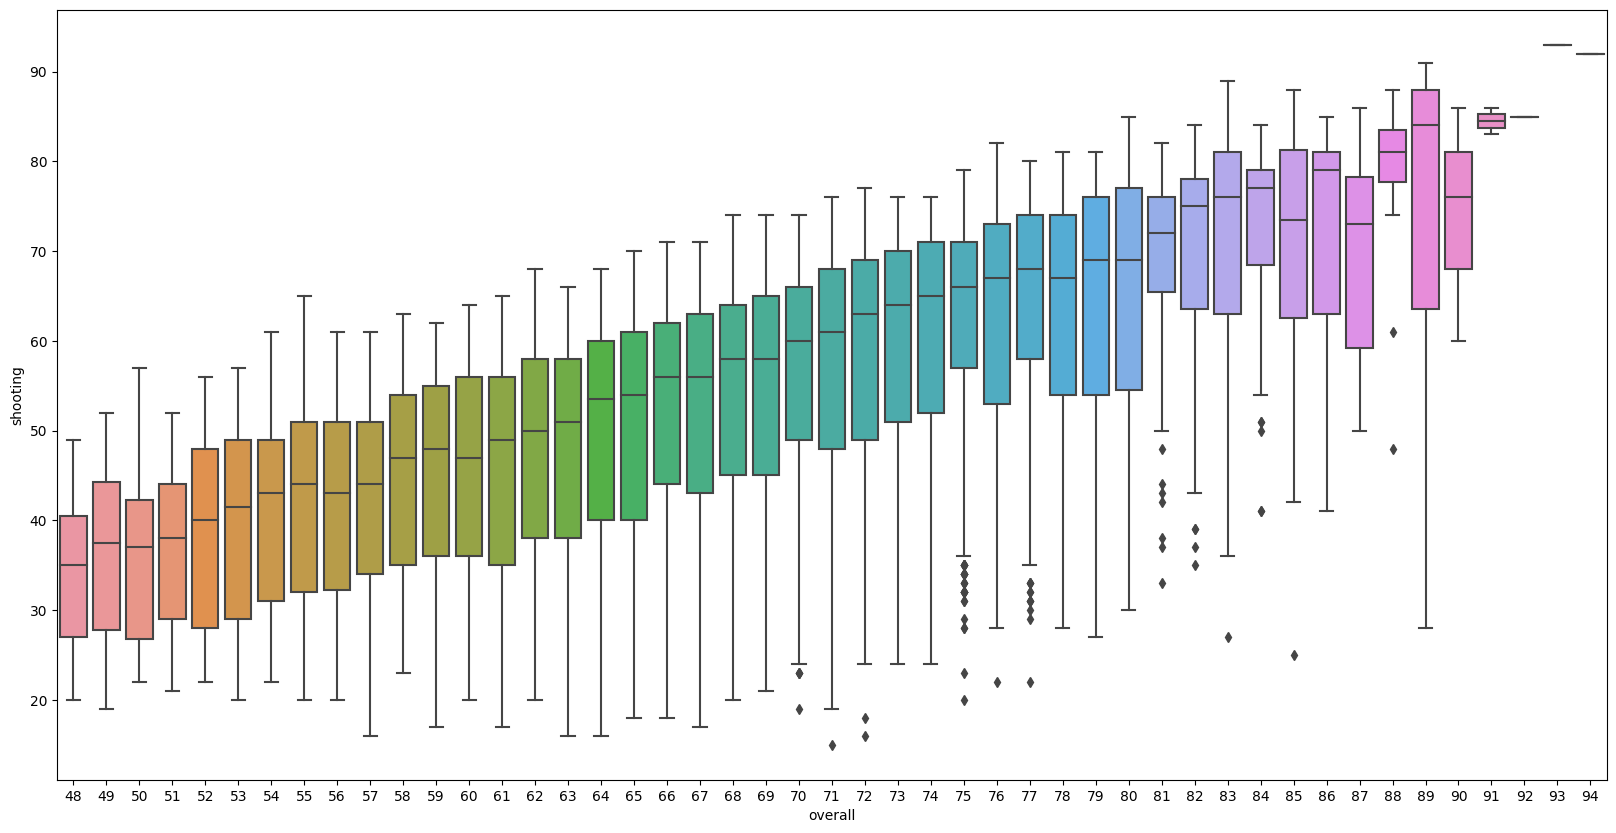

In [90]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(ax=ax, data=df, x="overall", y="shooting")
plt.show()

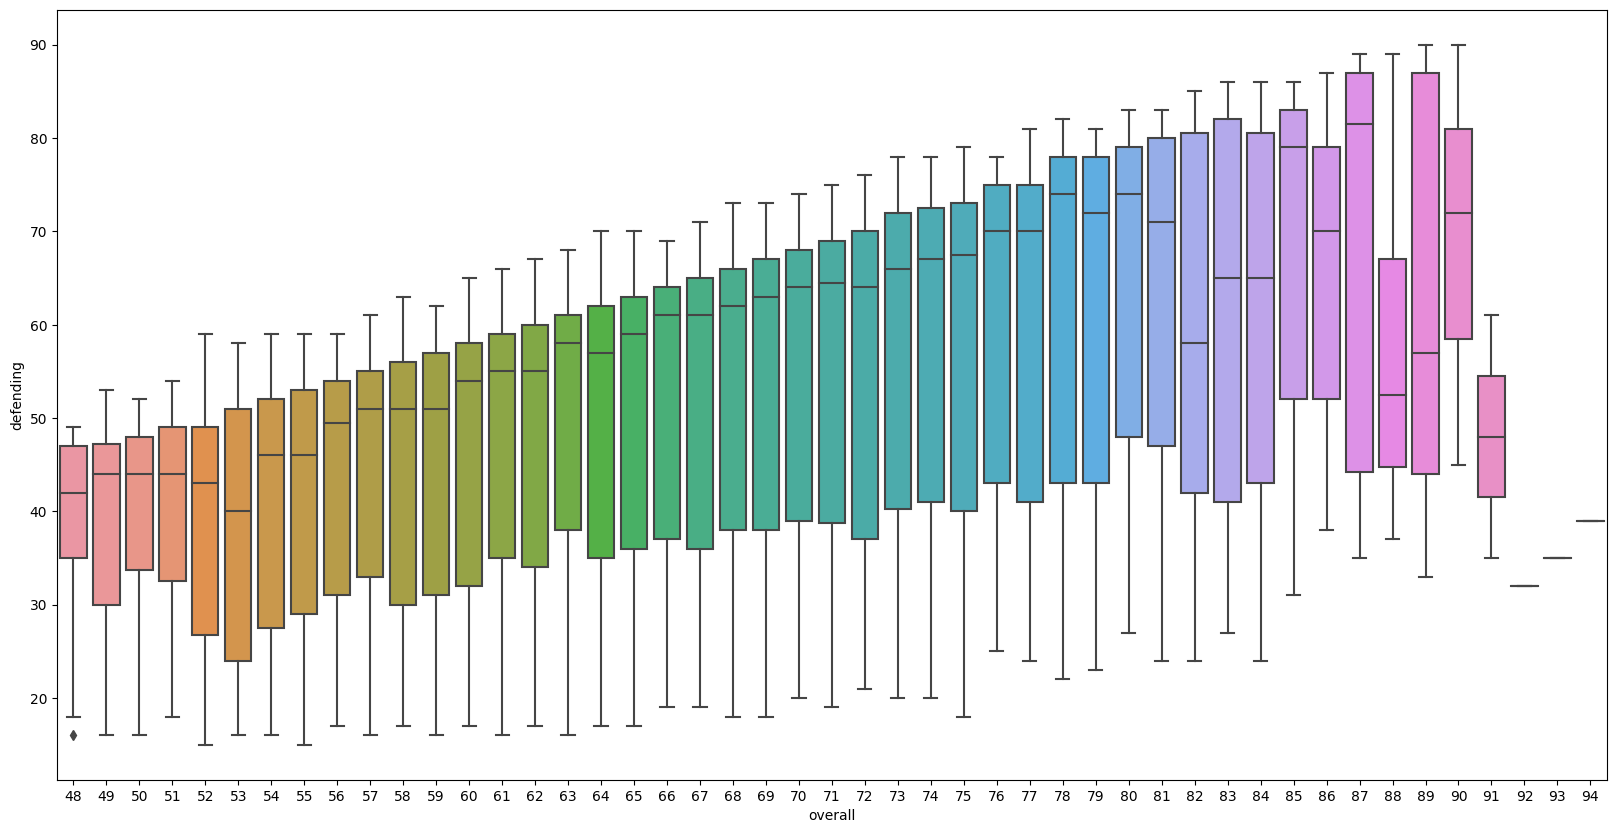

In [93]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(ax=ax, data=df, x="overall", y="defending")
plt.show()